In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow

In [2]:
!unzip /content/drive/MyDrive/fire_dataset.zip -d /content/

Archive:  /content/drive/MyDrive/fire_dataset.zip
   creating: /content/fire_dataset/
   creating: /content/fire_dataset/fire_images/
  inflating: /content/fire_dataset/fire_images/fire.1.png  
  inflating: /content/fire_dataset/fire_images/fire.10.png  
  inflating: /content/fire_dataset/fire_images/fire.100.png  
  inflating: /content/fire_dataset/fire_images/fire.101.png  
  inflating: /content/fire_dataset/fire_images/fire.102.png  
  inflating: /content/fire_dataset/fire_images/fire.103.png  
  inflating: /content/fire_dataset/fire_images/fire.104.png  
  inflating: /content/fire_dataset/fire_images/fire.105.png  
  inflating: /content/fire_dataset/fire_images/fire.106.png  
  inflating: /content/fire_dataset/fire_images/fire.107.png  
  inflating: /content/fire_dataset/fire_images/fire.108.png  
  inflating: /content/fire_dataset/fire_images/fire.109.png  
  inflating: /content/fire_dataset/fire_images/fire.11.png  
  inflating: /content/fire_dataset/fire_images/fire.110.png  
  

In [3]:
img = cv2.imread("/content/fire_dataset/fire_images/fire.1.png")

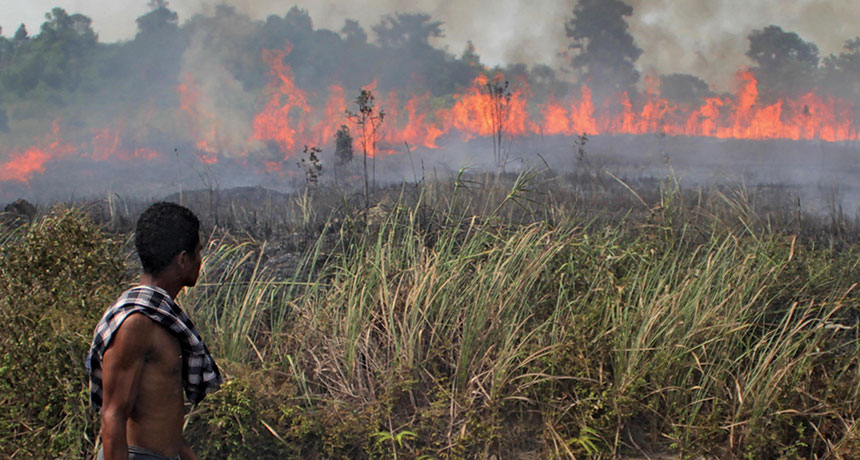

In [4]:
cv2_imshow( img)

## LoadDataset

In [5]:
size = 50

In [6]:
X = []
y = []

In [7]:
for image in os.listdir("/content/fire_dataset/fire_images/"):
  img = cv2.imread(f"/content/fire_dataset/fire_images/{image}")
  img_converted_size = cv2.resize(img, (size, size))
  X.append(img_converted_size.flatten())
  y.append(1)

In [8]:
for image in os.listdir("/content/fire_dataset/non_fire_images/"):
  img = cv2.imread(f"/content/fire_dataset/non_fire_images/{image}")
  img_converted_size = cv2.resize(img, (size, size))
  X.append(img_converted_size.flatten())
  y.append(0)

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(998, 7500)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Run Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression(random_state=42)

In [15]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [16]:
y_pred = lr.predict(X_test)

## Report Accuracy & Confusion Matrix

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
acc = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

In [19]:
print(f"Accuracy: {acc}")

Accuracy: 0.9


In [20]:
con_matrix

array([[ 52,  23],
       [  7, 218]])

<Axes: >

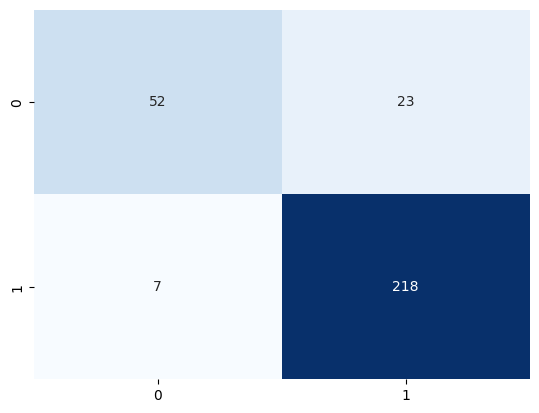

In [21]:
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

## Find Best Threshold

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
lr = LogisticRegression(random_state=42)

In [24]:
y_pred = cross_val_predict(lr, X_train, y_train, cv=5, method='predict_proba')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [25]:
thresholds = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for threshold in thresholds:
    y_train_pred_class = (y_pred[:, 1] > threshold).astype(int)
    accuracy = accuracy_score(y_train, y_train_pred_class)
    accuracy_scores.append(accuracy)

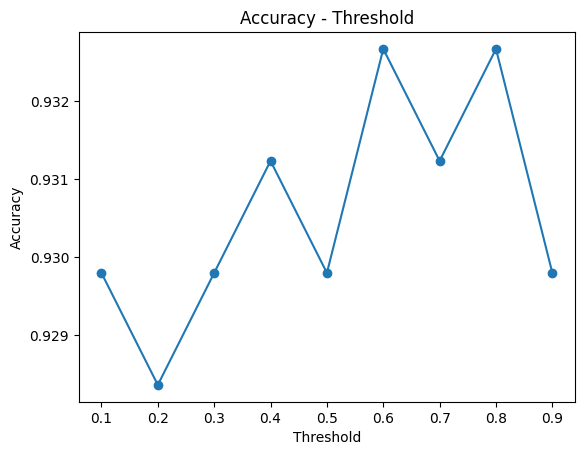

In [26]:
plt.plot(thresholds, accuracy_scores, 'o-')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy - Threshold')
plt.show()

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = (lr.predict_proba(X_test)[:, 1] > 0.8).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
acc = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

In [29]:
print(f"Accuracy: {acc}")

Accuracy: 0.9066666666666666


In [30]:
con_matrix

array([[ 56,  19],
       [  9, 216]])

<Axes: >

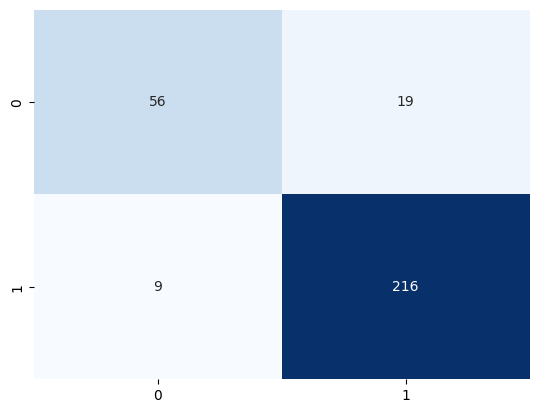

In [31]:
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

## Save Model | Predict New Image

### Save Model

In [32]:
import pickle

In [41]:
pickle.dump(lr, open("/content/drive/My Drive/ForestFireDetectionModel.pickle", "wb"))

### Load Model

In [42]:
forest_fire_model = pickle.load(open("/content/drive/My Drive/ForestFireDetectionModel.pickle", "rb"))

In [35]:
forest_fire_model

LogisticRegression()

### Test Model

In [36]:
!wget -O img1.jpg https://gdb.voanews.com/054f5cb3-1868-4b15-a6a8-7e5717759c0f_w1023_r1_s.jpg 

--2023-05-19 16:17:23--  https://gdb.voanews.com/054f5cb3-1868-4b15-a6a8-7e5717759c0f_w1023_r1_s.jpg
Resolving gdb.voanews.com (gdb.voanews.com)... 23.198.138.252, 2600:1417:76:68b::131b, 2600:1417:76:683::131b
Connecting to gdb.voanews.com (gdb.voanews.com)|23.198.138.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189575 (185K) [image/jpeg]
Saving to: ‘img1.jpg’

img1.jpg            100%[===================>] 185.13K  --.-KB/s    in 0.04s   

2023-05-19 16:17:23 (4.14 MB/s) - ‘img1.jpg’ saved [189575/189575]



In [37]:
!wget -O img2.jpg https://www.forestfoundation.ph/wp-content/uploads/2022/03/david-clode-DNGC_M-Bvsk-unsplash-1500x998.jpg

--2023-05-19 16:17:23--  https://www.forestfoundation.ph/wp-content/uploads/2022/03/david-clode-DNGC_M-Bvsk-unsplash-1500x998.jpg
Resolving www.forestfoundation.ph (www.forestfoundation.ph)... 104.21.10.178, 172.67.146.41, 2606:4700:3031::ac43:9229, ...
Connecting to www.forestfoundation.ph (www.forestfoundation.ph)|104.21.10.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483855 (473K) [image/jpeg]
Saving to: ‘img2.jpg’

img2.jpg            100%[===================>] 472.51K  --.-KB/s    in 0.05s   

2023-05-19 16:17:24 (8.65 MB/s) - ‘img2.jpg’ saved [483855/483855]



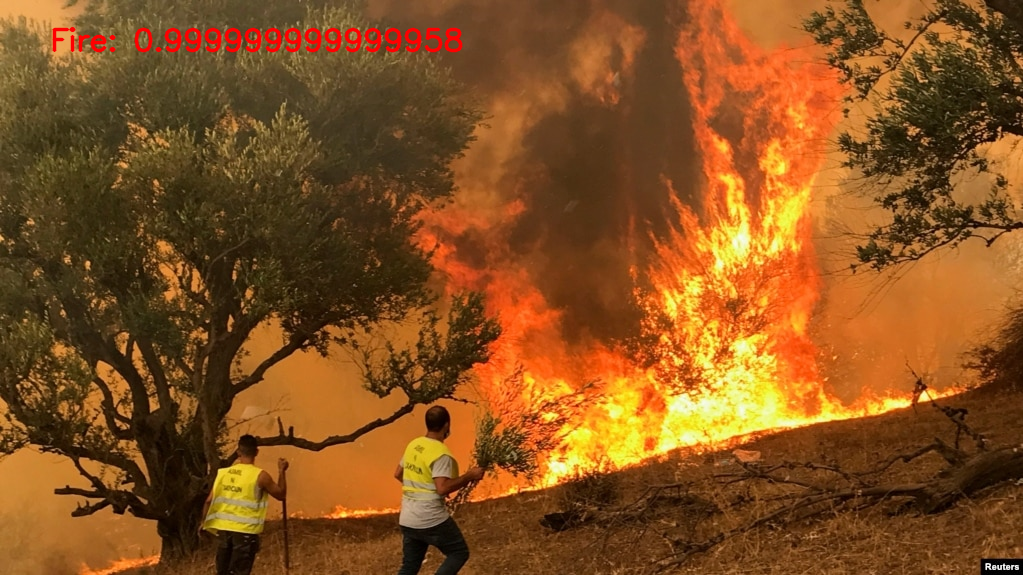

In [38]:
result = forest_fire_model.predict_proba([cv2.resize(cv2.imread("/content/img1.jpg"), (size,size)).flatten()])

img1 = cv2.imread("/content/img1.jpg")
if result[0][1]>0.1:
  img1 = cv2.putText(img1, f"Fire: {result[0][1]}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
else:
  img1 = cv2.putText(img1, f"No Fire: {result[0][0]}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow( img1)

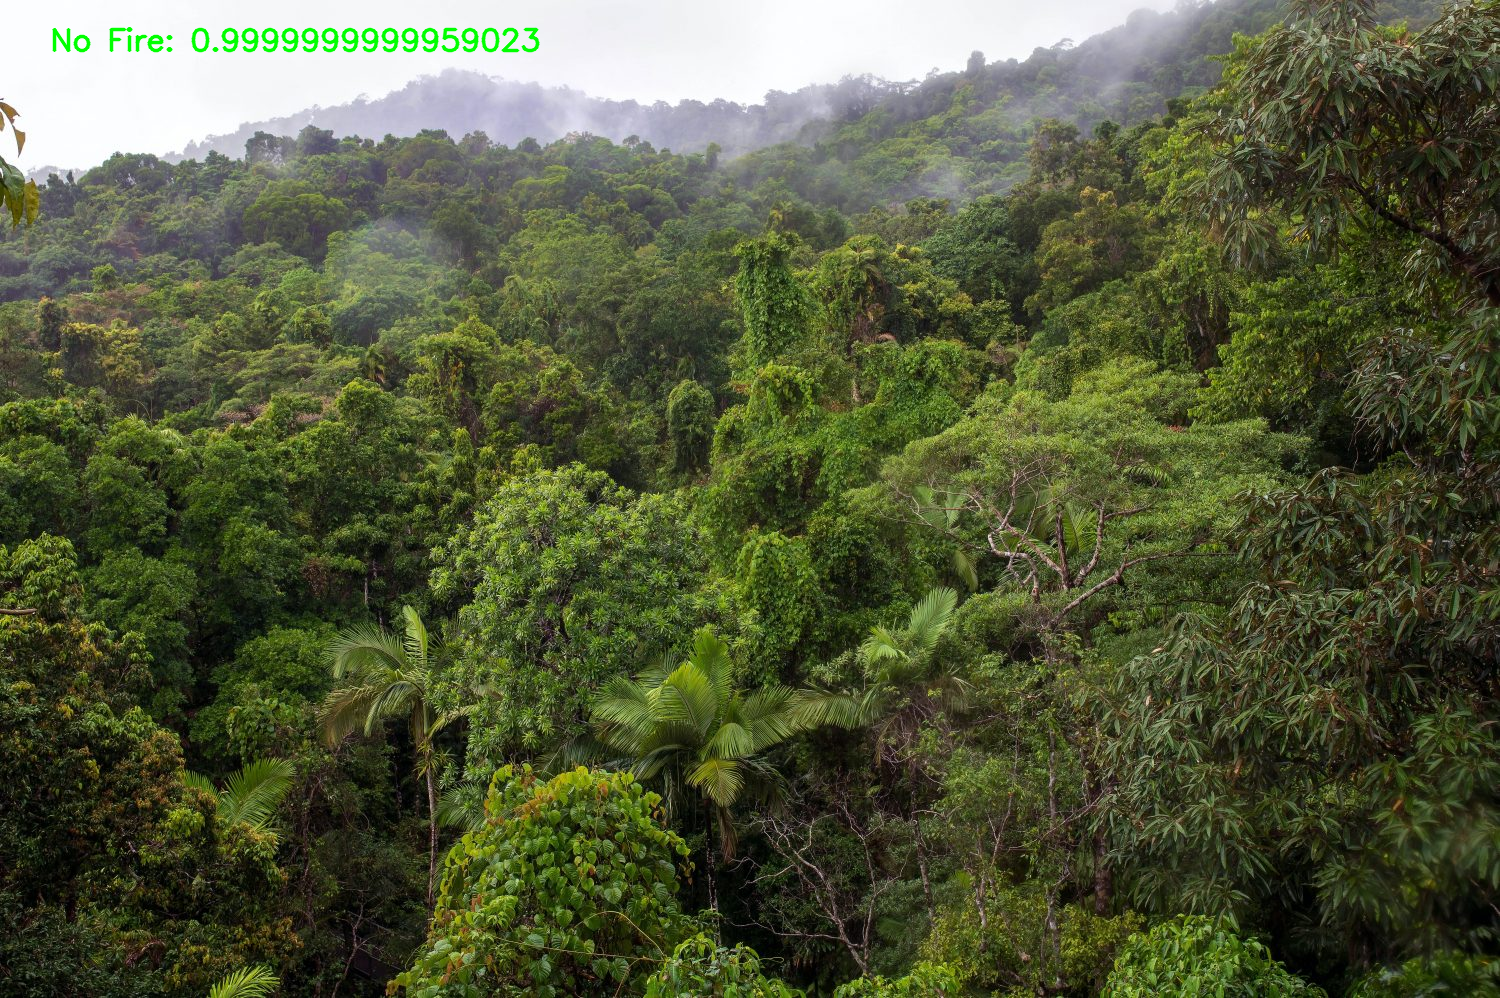

In [39]:
result = forest_fire_model.predict_proba([cv2.resize(cv2.imread("/content/img2.jpg"), (size,size)).flatten()])

img1 = cv2.imread("/content/img2.jpg")
if result[0][1]>0.1:
  img1 = cv2.putText(img1, f"Fire: {result[0][1]}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
else:
  img1 = cv2.putText(img1, f"No Fire: {result[0][0]}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow( img1)